In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#import geopandas as gpd
import re
import sklearn
import numpy as np
from sklearn.neighbors import NearestNeighbors
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5);
sns.set_style('whitegrid')

In [2]:
by_customer = pd.read_csv('./order_by_customer.csv')
customer = pd.read_csv('./customer_basic.csv')
restaurant = pd.read_csv('./restaurant.csv')

In [3]:
by_customer = by_customer.drop('Unnamed: 0',axis=1)
by_customer


,customer_id,VENDOR
0,92PEE24,105 105 105 105
1,QS68UD8,294 43
2,MB7VY5F,83 83 83 83
3,KDJ951Y,90
4,BAL0RVT,83 83 83 83 84 84 216 216
...,...,...
27440,0DSR94W,84
27441,3S6VG6R,199
27442,ND4PIJL,907
27443,1NRK5HF,105


In [4]:
customer

,Unnamed: 0,customer_id,gender,location_number,location_type,latitude_x,longitude_x,city_id,tag_1,tag_2,...,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91,grand_total,item_count
0,0,TCHWPBT,0,0,1,-96.4400,-67.20000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
1,100,TCHWPBT,0,1,0,-96.6000,-67.20000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
2,200,TCHWPBT,0,2,2,-0.1287,-78.56000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
3,300,ZGFSYCZ,0,0,0,-0.1755,-78.56000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
4,400,ZGFSYCZ,0,1,0,0.1912,-78.60000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49180,5800500,NCTU1O6,3,0,2,-0.7095,0.12463,1.0,0,1,...,0,0,0,0,0,0,0,0,8.400000,1.000000
49181,5800700,MSEGQHZ,3,0,0,13.3500,-1.38700,1.0,0,0,...,0,0,0,0,0,0,0,0,6.000000,3.000000
49182,5800900,ERHULM8,3,0,0,-1.1490,-0.17960,1.0,1,0,...,0,0,0,0,0,0,0,1,0.900000,3.000000
49183,5801700,LE63M0S,1,0,2,-1.3260,0.05917,1.0,0,0,...,0,0,0,0,0,0,0,0,11.400000,2.000000


In [5]:
for i in restaurant.keys():
    print(i)

Unnamed: 0
vendor_id
vendor_rating2
favorite_by
rated_by
favorite_percentage
rated_percentage
average_price
average_item_sold
latitude
longitude
vendor_category_id
delivery_charge
prepration_time
discount_percentage
status
verified
rank
vendor_rating
one_click_vendor
city_id
tag_1
tag_2
tag_3
tag_4
tag_5
tag_6
tag_7
tag_8
tag_9
tag_10
tag_11
tag_12
tag_13
tag_14
tag_15
tag_16
tag_17
tag_18
tag_19
tag_20
tag_21
tag_22
tag_23
tag_24
tag_25
tag_26
tag_27
tag_28
tag_29
tag_30
tag_31
tag_32
tag_33
tag_34
tag_35
tag_36
tag_37
tag_38
tag_39
tag_40
tag_41
tag_42
tag_43
tag_44
tag_45
tag_46
tag_47
tag_48
tag_49
tag_50
tag_51
tag_52
tag_53
tag_54
tag_55
tag_56
tag_57
tag_58
tag_59
tag_60
tag_61
tag_62
tag_63
tag_64
tag_65
tag_66
tag_67
tag_68
tag_69
tag_70
tag_71
tag_72
tag_73
tag_74
tag_75
tag_76
tag_77
tag_78
tag_79
tag_80
tag_81
tag_82
tag_83
tag_84
tag_85
tag_86
tag_87
tag_88
tag_89
tag_90
tag_91


In [6]:
restaurant

,Unnamed: 0,vendor_id,vendor_rating2,favorite_by,rated_by,favorite_percentage,rated_percentage,average_price,average_item_sold,latitude,...,tag_82,tag_83,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91
0,0,4,3.949462,16.350257,276,0.370686,0.129153,3.949462,3.108527,-0.588596,...,0,0,0,0,0,0,0,0,0,1
1,1,13,3.997264,17.902189,115,0.377072,0.157319,3.997264,2.184566,-0.471654,...,0,0,0,0,0,0,0,0,0,0
2,2,20,4.040328,23.338500,201,0.411239,0.126654,4.040328,2.655098,-0.407527,...,0,0,0,0,0,0,0,0,0,1
3,3,23,4.180435,23.201848,122,0.343921,0.132609,4.180435,2.542363,-0.585385,...,0,0,0,0,0,0,0,0,0,0
4,4,28,3.682498,12.937671,225,0.214428,0.146389,3.682498,3.093899,0.480602,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,849,4.785380,11.483037,277,0.040300,0.259606,4.785380,1.988754,-1.588060,...,0,0,0,0,0,0,0,0,0,1
96,96,855,4.799037,12.058965,213,0.034898,0.256318,4.799037,2.037304,2.145206,...,0,0,0,0,0,0,0,0,0,1
97,97,856,4.823529,12.232638,243,0.011385,0.230550,4.823529,2.064516,0.251469,...,0,0,0,0,0,0,0,0,0,1
98,98,858,4.836047,11.285465,187,0.016279,0.217442,4.836047,1.966279,0.019817,...,0,0,0,0,0,0,0,0,0,1


In [7]:
customer.dropna()

,Unnamed: 0,customer_id,gender,location_number,location_type,latitude_x,longitude_x,city_id,tag_1,tag_2,...,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91,grand_total,item_count
0,0,TCHWPBT,0,0,1,-96.4400,-67.20000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
1,100,TCHWPBT,0,1,0,-96.6000,-67.20000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
2,200,TCHWPBT,0,2,2,-0.1287,-78.56000,1.0,1,1,...,0,0,0,0,0,0,0,1,6.650000,2.289742
3,300,ZGFSYCZ,0,0,0,-0.1755,-78.56000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
4,400,ZGFSYCZ,0,1,0,0.1912,-78.60000,1.0,42,7,...,0,0,0,0,0,0,7,42,17.070732,2.656035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49180,5800500,NCTU1O6,3,0,2,-0.7095,0.12463,1.0,0,1,...,0,0,0,0,0,0,0,0,8.400000,1.000000
49181,5800700,MSEGQHZ,3,0,0,13.3500,-1.38700,1.0,0,0,...,0,0,0,0,0,0,0,0,6.000000,3.000000
49182,5800900,ERHULM8,3,0,0,-1.1490,-0.17960,1.0,1,0,...,0,0,0,0,0,0,0,1,0.900000,3.000000
49183,5801700,LE63M0S,1,0,2,-1.3260,0.05917,1.0,0,0,...,0,0,0,0,0,0,0,0,11.400000,2.000000


In [8]:
customer_array = customer.to_numpy()[:,2:]
restaurant_rare = restaurant.copy()
customer_array

array([[0, 0, 1, ..., 1, 6.65, 2.289741952599145],
       [0, 1, 0, ..., 1, 6.65, 2.289741952599145],
       [0, 2, 2, ..., 1, 6.65, 2.289741952599145],
       ...,
       [3, 0, 0, ..., 1, 0.9, 3.0],
       [1, 0, 2, ..., 0, 11.4, 2.0],
       [1, 0, 2, ..., 0, 27.7, 4.0]], dtype=object)

# User Base Recommendation

## Assign weights to each feature

### city_id is supper critical, so we assign large weight. (customer_array[:,5]*=100.) Note that latitude_x and	longitude_x is also important but originally has large variance, so we keep them the same.)
### We want to amplify the customer's preference (customer_array[:,6]*=3.)
### grand_total and	item_count may not be so important, we dilute them (customer_array[:,-2:]/=3.)

### For each query we generate three results, two of them are based on the user's preference. The last one are on food categories that's less frequent

In [9]:
customer_array[:,-2:]/=3.
customer_array[:,5]*=100.
customer_array[:,6:]*=3.

0.0
[0.0 0.0 0.0 0.0 0.0 0.0 17148.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2277.0 0.0 0.0 18402.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 15198.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 18162.0 0.0 0.0 0.0 0.0 0.0 11355.0 0.0 0.0 0.0 0.0 0.0 17577.0
 0.0 0.0 11886.0 0.0 0.0 0.0 0.0 0.0]


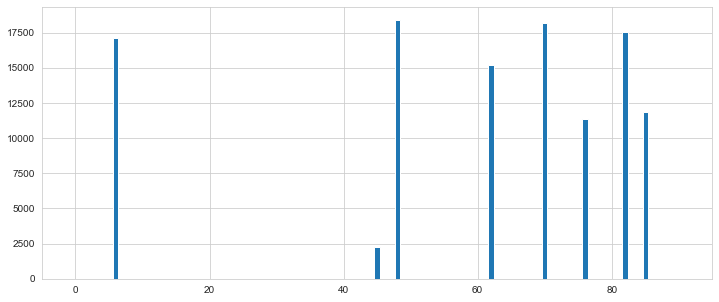

(91,)


In [10]:
customer_array_rare = customer_array.copy()[:,6:-2]
rare_ind = np.abs(np.sum(customer_array_rare,0))>20000
customer_array_rare[:,rare_ind]*=0
print(np.min(customer_array_rare))
distribution = np.sum(customer_array_rare,0)
print(distribution)
plt.bar([i for i in range(len(distribution))],distribution)
plt.show()
print(rare_ind.shape)


for i in range(rare_ind.shape[0]):
    if rare_ind[i]==True:
        index_names = restaurant_rare[(restaurant_rare['tag_'+str(int(i+1))]>0)].index
        restaurant_rare.drop(index_names, inplace = True)
        

In [11]:
by_customer_rare = by_customer.copy()
keep = restaurant_rare['vendor_id'].values.tolist()
print(keep)
for i in range(len(by_customer_rare)):
    s = by_customer_rare.iloc[i]['VENDOR']
    v = s.split(' ')
    v_ = [t for t in v if int(t) in keep]
    s_ = ' '.join(v_)
    by_customer_rare.iloc[i]['VENDOR']= s_
by_customer_rare

[196, 231, 243]


,customer_id,VENDOR
0,92PEE24,
1,QS68UD8,
2,MB7VY5F,
3,KDJ951Y,
4,BAL0RVT,
...,...,...
27440,0DSR94W,
27441,3S6VG6R,
27442,ND4PIJL,
27443,1NRK5HF,


In [12]:
index_names = by_customer_rare[(by_customer_rare['VENDOR']=='')].index
remove_customer_ids = by_customer_rare[(by_customer_rare['VENDOR']=='')]['customer_id'].values
by_customer_rare.drop(index_names, inplace = True)
#customer_id_to_drop = by_customer_rare.iloc[index_names]['customer_id']
by_customer_rare

,customer_id,VENDOR
25,N41VQEP,196
26,IZ17PI0,196 196 196 196 196 196 196 196 196 196 196 19...
44,KHL0M3N,231 231
53,1WUPJGN,231
59,NPO5O5W,196
...,...,...
13656,QIFCA7O,231
13672,IESAASG,231
14710,FQ2E19C,231
16702,A1RQGPI,231


In [13]:
print('NNUA624' in remove_customer_ids)

True


In [14]:
remove_customer_ids

array(['92PEE24', 'QS68UD8', 'MB7VY5F', ..., 'ND4PIJL', '1NRK5HF',
       'QDXLWM7'], dtype=object)

In [15]:
remove_customer_ids = remove_customer_ids.tolist()
customer_rare = customer.copy()
for idx,name in enumerate(remove_customer_ids):
    if idx%500==0:
        print("%d of %d"%(idx,len(remove_customer_ids)))
    index_names = customer_rare[(customer_rare['customer_id']==name)].index
    customer_rare.drop(index_names, inplace = True)
customer_rare

0 of 26219
500 of 26219
1000 of 26219
1500 of 26219
2000 of 26219
2500 of 26219
3000 of 26219
3500 of 26219
4000 of 26219
4500 of 26219
5000 of 26219
5500 of 26219
6000 of 26219
6500 of 26219
7000 of 26219
7500 of 26219
8000 of 26219
8500 of 26219
9000 of 26219
9500 of 26219
10000 of 26219
10500 of 26219
11000 of 26219
11500 of 26219
12000 of 26219
12500 of 26219
13000 of 26219
13500 of 26219
14000 of 26219
14500 of 26219
15000 of 26219
15500 of 26219
16000 of 26219
16500 of 26219
17000 of 26219
17500 of 26219
18000 of 26219
18500 of 26219
19000 of 26219
19500 of 26219
20000 of 26219
20500 of 26219
21000 of 26219
21500 of 26219
22000 of 26219
22500 of 26219
23000 of 26219
23500 of 26219
24000 of 26219
24500 of 26219
25000 of 26219
25500 of 26219
26000 of 26219


,Unnamed: 0,customer_id,gender,location_number,location_type,latitude_x,longitude_x,city_id,tag_1,tag_2,...,tag_84,tag_85,tag_86,tag_87,tag_88,tag_89,tag_90,tag_91,grand_total,item_count
28,2800,IL9MJSW,0,0,0,-0.65140,-78.50000,1.0,34,17,...,0,0,0,0,0,0,0,51,26.276271,3.066058
29,2900,IL9MJSW,0,1,0,-0.27690,-78.56000,1.0,34,17,...,0,0,0,0,0,0,0,51,26.276271,3.066058
30,3000,IL9MJSW,0,2,0,0.09510,-78.60000,1.0,34,17,...,0,0,0,0,0,0,0,51,26.276271,3.066058
31,3100,IL9MJSW,0,3,0,-1.87700,-78.40000,1.0,34,17,...,0,0,0,0,0,0,0,51,26.276271,3.066058
32,3200,IL9MJSW,0,4,1,-0.49400,-78.56000,1.0,34,17,...,0,0,0,0,0,0,0,51,26.276271,3.066058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41219,4547900,93DLHIU,0,0,0,-1.29300,-0.07837,1.0,4,0,...,0,0,0,0,0,0,0,0,12.740000,2.600000
41220,4548000,93DLHIU,0,1,0,0.07837,0.31600,1.0,4,0,...,0,0,0,0,0,0,0,0,12.740000,2.600000
41226,4548600,S5V09MW,0,0,2,1.74800,0.73000,1.0,0,0,...,0,0,0,0,0,0,0,1,5.733333,1.333333
41227,4548700,S5V09MW,0,1,2,2.34400,0.70460,1.0,0,0,...,0,0,0,0,0,0,0,1,5.733333,1.333333


In [16]:
customer_array

array([[0, 0, 1, ..., 3.0, 6.65, 2.289741952599145],
       [0, 1, 0, ..., 3.0, 6.65, 2.289741952599145],
       [0, 2, 2, ..., 3.0, 6.65, 2.289741952599145],
       ...,
       [3, 0, 0, ..., 3.0, 0.8999999999999999, 3.0],
       [1, 0, 2, ..., 0.0, 11.4, 2.0],
       [1, 0, 2, ..., 0.0, 27.699999999999996, 4.0]], dtype=object)

In [17]:
customer_array[0]

array([0, 0, 1, -96.44, -67.2, 100.0, 3.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0,
       6.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 6.65, 2.289741952599145],
      dtype=object)

In [18]:
by_customer_rare.to_csv('by_customer_rare.csv')
customer_rare = customer_rare.astype({'latitude_x':float,'longitude_x':float})
customer_rare = customer_rare.dropna()
#customer_rare.drop(['Unnamed: 0'],axis=1)
customer_rare.to_csv('customer_rare.csv')

In [19]:
customer_rare_array = customer_rare.to_numpy()[:,2:]
customer_rare_array[:,-2:]/=3.
customer_rare_array[:,5]*=100.
customer_rare_array[:,6:]*=3.

In [20]:
customer = customer.astype({'latitude_x':float,'longitude_x':float})
customer = customer.dropna()
customer.to_csv('customer.csv')

In [21]:
customer_array = customer.to_numpy()[:,2:]
customer_array[:,-2:]/=3.
customer_array[:,5]*=100.
customer_array[:,6:]*=3.
customer_array = customer_array.astype(float)
idxs = np.where(np.isnan(customer_array.astype(float))==True)
mask = [i for i in range(customer_array.shape[0]) if i not in idxs[0].tolist()]
customer_array = customer_array[mask]

In [22]:

print(np.max(customer_array.astype(float)))
print(np.max(customer_array.astype(float)))
print(np.any(np.isnan(customer_rare_array.astype(float))))
print(np.any(np.isnan(customer_array.astype(float))))

4230.0
4230.0
False
False


In [23]:
np.save("customer_array",customer_array)
np.save("customer_rare_array",customer_rare_array)
by_customer_rare.to_csv('by_customer_rare.csv')
by_customer.to_csv('by_customer.csv')